# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

Based on the evidence and testing Ramicane should be investigated further along with Capomulin.

Ramicane's mean of tumor volume (mm3) is 40.216745(mm3) versus Capomulin's 40.675741(mm3), which is slightly better. The next closest is Propiva at a mean 52.320930(mm3) tumor volume (mm3).

Same for median as Ramicane's median of 40.673236(mm3) and Capomulin is 41.557809(mm3).

The SEM (standard error of measurement) is also lower for Ramicane at .320955 versus Capomulins at .329346.

It is notable that Capomulin had 230 mice alive at the end of the study, whereas Ramicane only had 228, not a huge difference,but if Ramicane could cause death, I beieve companies would want to stay away from using this product



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
study_data_complete= pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
study_data_complete.head(10)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
number_of_mice=len(study_data_complete["Mouse ID"].unique())
print(number_of_mice)

#print(f'Number of mice raw data: ',number_of_mice)


249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#print(f'number of mice: {number_of_mice}')
duplicate_mouse_ids=study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mouse_data = mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989"]
#duplicate_mouse_data.head()
duplicate_mouse_data  = study_data_complete.loc[study_data_complete["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mouse_data = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mouse_data)==False]
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [15]:
#calculatemeans=clean_study_data_complete.groupby("Drug Regime").mean ()

In [18]:
means = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [20]:
median = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [23]:
variances = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variances

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [24]:
stds = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stds

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [25]:
sems = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sems

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#summaryData=mc_db[["Drug Regimen", "Tumor Volume (mm3)"]]
#groupByData =summaryData.groupby(["Drug Regimen"])


# This method is the most straighforward, creating multiple series and putting them all together at the end.



# Assemble the resulting series into a single summary DataFrame.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

In [29]:
summaryDict= {
    "Mean Tumor Volume":means,
    "Median Tumor Volume":median,
    "Tumor Volume Variance":variances,
    "Tumor Volume Standar Deviation":stds,
    "Tumor Volume SEM":sems 
                        }

df=pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standar Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
df2=clean_study_data_complete.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}
)
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [33]:
counts=clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

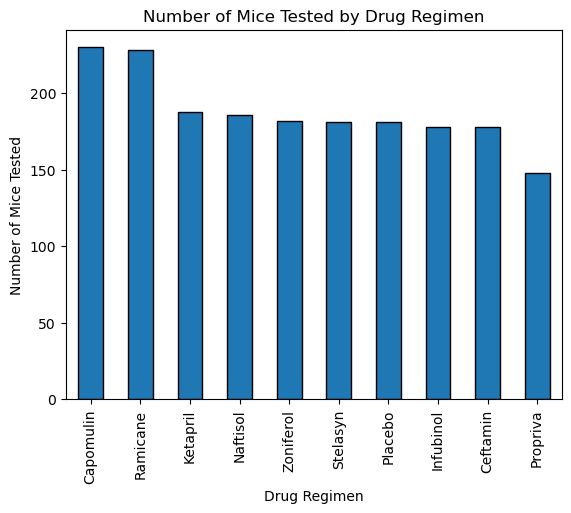

In [36]:

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts=clean_study_data_complete["Drug Regimen"].value_counts()
counts.plot(kind="bar", 
          #colors=["black", "red", "green", "blue", "cyan", "yellow", "orange", "purple", "pink", "olive", "brown"],
          edgecolor = "Black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [37]:
counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [38]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

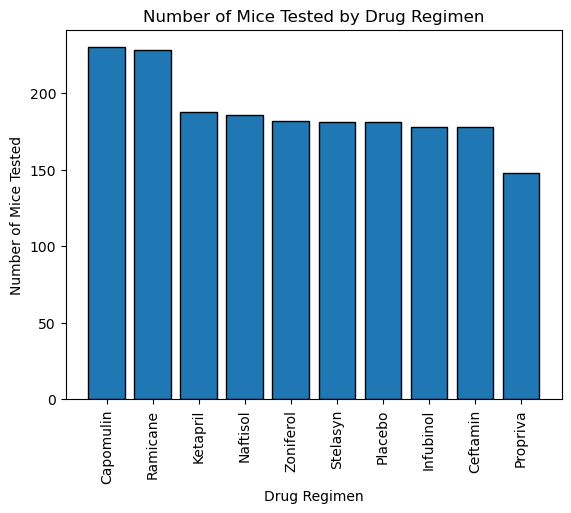

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
       #colors="black", "red", "green", "blue", "cyan", "yellow", "orange", "purple", "pink", "olive", "brown"])
        edgecolor = "Black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [43]:
counts = clean_study_data_complete["Sex"].value_counts()
counts

Sex
Male      958
Female    922
Name: count, dtype: int64

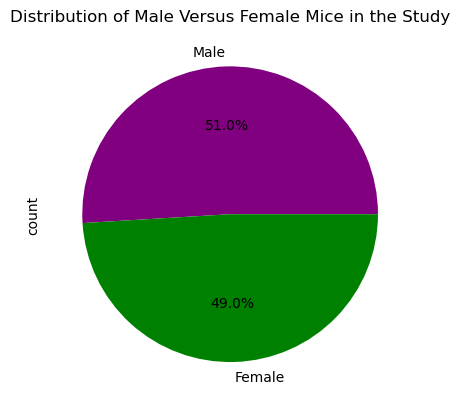

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["purple", "green"]
)
plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()

In [45]:
counts.index.values

array(['Male', 'Female'], dtype=object)

In [46]:
counts.values

array([958, 922], dtype=int64)

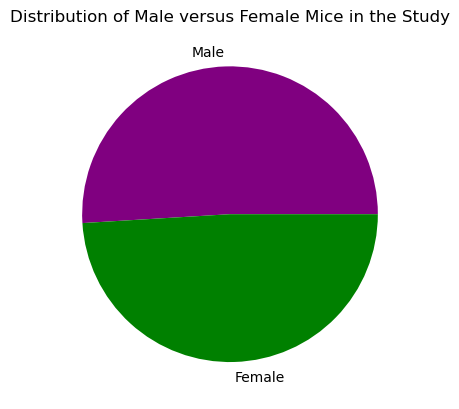

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    counts.values,
    labels=counts.index.values,
    colors=["purple", "green"]
)
plt.title("Distribution of Male versus Female Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [52]:
clean_study_data_complete.head()
maxTime=clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
maxTime=maxTime.reset_index()
maxTime

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [53]:
merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"],  how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [55]:
tumor_vol_list = []

In [57]:
for treatment in treatment_list:
    print(treatment)

Capomulin
Ramicane
Infubinol
Ceftamin


In [65]:
tumor_vol_list = []

for treatment in treatment_list:
    
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tumor_volume)
    
    quartiles = final_tumor_volume.quantile([.25,.5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    if len (outliers) == 0:
        print(f"{treatment}'s potential outliers:None")
    else:
        output = (f"{treatment}'s potential outliers:None")
        for o in outliers:
            output += f"{o} "
        print(output)  
    
    


Capomulin's potential outliers:None
Ramicane's potential outliers:None
Infubinol's potential outliers:None36.3213458 
Ceftamin's potential outliers:None


In [66]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


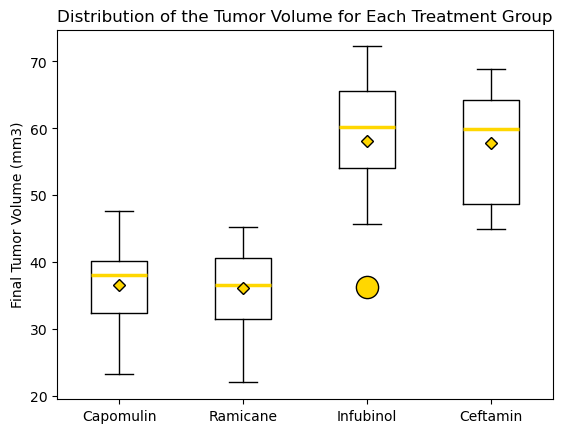

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker="o", markerfacecolor= "gold" , markersize =16, 
                  markeredgecolor = "black")
medianprops = dict(linestyle = "-", linewidth=2.5, color="gold")
meanpointprops = dict(marker="D", markeredgecolor="black", 
                     markerfacecolor = "gold")
plt.boxplot(tumor_vol_list, labels =treatment_list, flierprops=flierprops, medianprops = medianprops, meanprops=meanpointprops,
           showmeans=True)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of the Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

In [72]:
capomulinDF=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [78]:
Datal509 = capomulinDF.loc[capomulinDF["Mouse ID"]=="l509"]
Datal509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


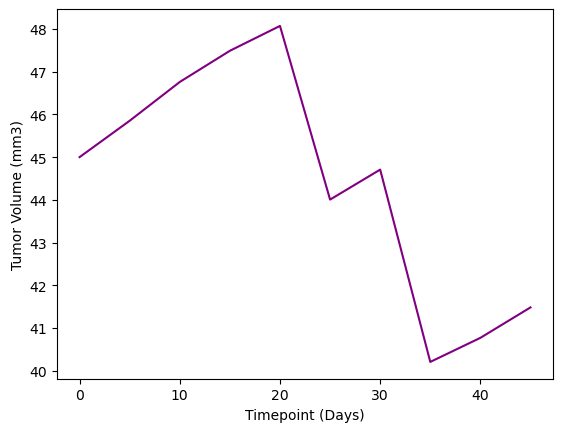

In [98]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(Datal509["Timepoint"],
        Datal509["Tumor Volume (mm3)"],
        color = "purple")
plt.title =("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
                 

In [99]:
capomulinAveragesDF = capomulinDF.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
capomulinAveragesDF.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


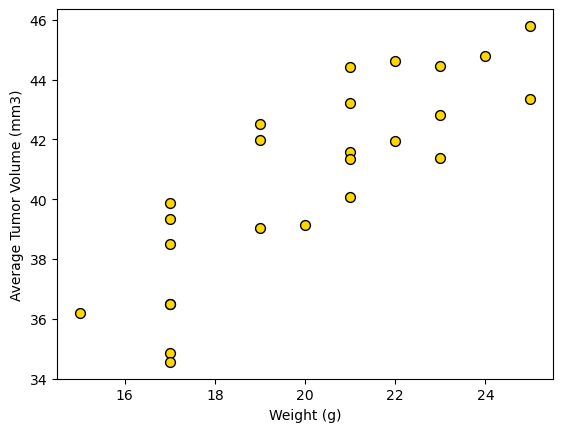

In [100]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulinAveragesDF["Weight (g)"],
    capomulinAveragesDF["Tumor Volume (mm3)"],
    facecolor = "gold",
    edgecolor = "black",
    s=50)

#plt.title("Average Tumor Volume Vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [102]:
corr = st.pearsonr(capomulinAveragesDF["Weight (g)"], capomulinAveragesDF["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:2f}")

The correlation between mouse weight and the average tumor volume is 0.841936


In [112]:
x_values = capomulinAveragesDF["Weight (g)"]
y_values = capomulinAveragesDF["Tumor Volume (mm3)"]

(slope,intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAveragesDF["Weight (g)"], capomulinAveragesDF["Tumor Volume (mm3)"])

regressValues = x_values * slope +intercept
lineEQ = f"y = {slope:2f}x + {intercept:2f}"

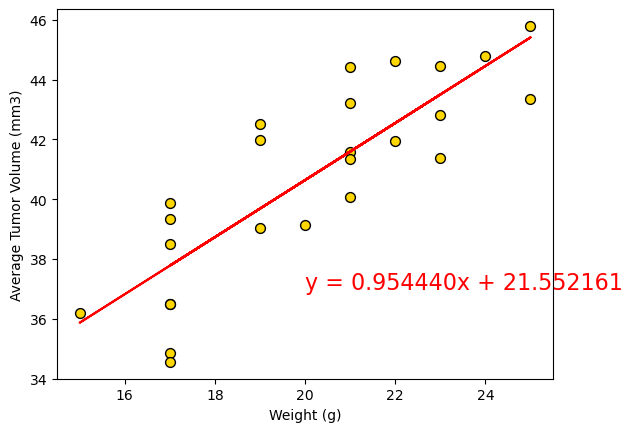

In [114]:
plt.scatter(x_values, y_values, facecolor="gold", edgecolor="black", s=50)

plt.plot(x_values, regressValues, "r-")
plt.annotate(lineEQ, (20,37), fontsize=16, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
